
Import the necessary libraries. X

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df. X

First look at its main features (head, shape, info). X

Rename the columns so they follow the PE8 (snake case). X

Change effective to date column to datetime format. X

Check NaN values per column. X 

Define a function that differentiates between continuous and discrete variables. Hint: A number of 
unique values might be useful. Store continuous data into a continuous variable and do the same for 
discrete and categorical.

For the categorical data, check if there is some kind of text in a variable so we would need to 
clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what 
to do with the variables you get.

Get categorical features.

What should we do with the customer_id column?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

customer_df.info()
customer_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

(9134, 24)

In [3]:
customer_df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [5]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
customer_df.shape

(9134, 24)

In [9]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
customer_df['income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

In [12]:
#replace zeros with median
median_income=customer_df['income'].median(skipna=True)
median_income

33889.5

In [13]:
customer_df['income']=customer_df.income.mask(customer_df.income==0,median_income)

In [14]:
customer_df['income'].value_counts()

33889.5    2317
95697.0      12
20978.0       7
40864.0       7
61108.0       7
           ... 
18779.0       1
61085.0       1
25074.0       1
49057.0       1
18944.0       1
Name: income, Length: 5694, dtype: int64

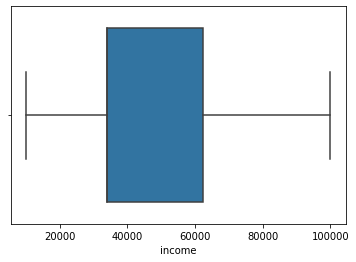

In [15]:
sns.boxplot(customer_df['income'])

In [16]:
numericals = customer_df.select_dtypes(np.number)
numericals.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879
5,8256.297800,62902.0,69,14,94,0,2,159.383042
6,5380.898636,55350.0,67,0,13,0,9,321.600000
7,7216.100311,33889.5,101,0,68,0,4,363.029680
8,24127.504020,14072.0,71,13,3,0,2,511.200000
9,7388.178085,28812.0,93,17,7,0,8,425.527834


In [17]:
numericals.nunique()


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [18]:
#CHECK THIS WITH TA


discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [19]:
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [20]:
continuous = list(numericals.drop(columns = discrete).columns)
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [21]:
categorical = customer_df.select_dtypes(object)
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [22]:
#CHECK THIS ALSO

categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]
categorical_columns

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [23]:
categorical_df=customer_df[categorical_columns]
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Load the continuous and discrete variables into continuous_df and discrete_df variables. X

Plot a correlation matrix, what can you see?  X

Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).  X

What can you see in the plots? 
Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
Have you found outliers? If you have, what should we do with them?

In [24]:
continuous_df = numericals.drop(columns = discrete)
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941.0,73,89,198.234764
9130,3096.511217,21604.0,79,28,379.200000
9131,8163.890428,33889.5,85,37,790.784983
9132,7524.442436,21941.0,96,3,691.200000


In [25]:
discrete_df = numericals.drop(columns = continuous)
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [26]:
numericals.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.012566,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.012566,1.000000,-0.014318,-0.030895,0.008274,0.011959,-0.004616,-0.265521
monthly_premium_auto,0.396262,-0.014318,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.030895,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,0.008274,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.011959,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.004616,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.265521,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


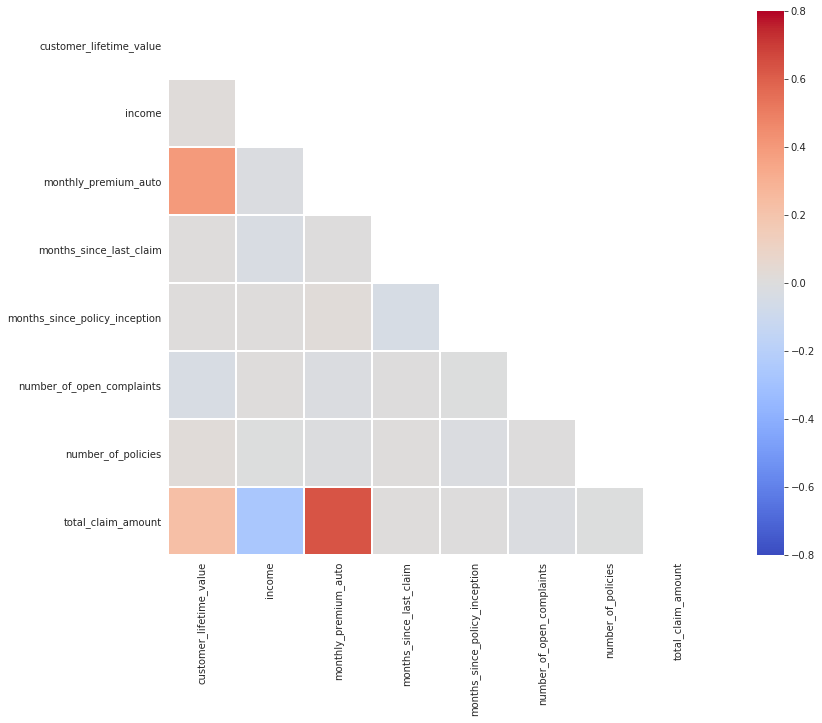

In [27]:

mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [28]:
def barplot_functionr(df):
    sns.set(rc={'figure.figsize':(8,5)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

In [29]:
df_bar(discrete_df)


NameError: name 'df_bar' is not defined

In [30]:
from matplotlib.colors import BASE_COLORS

def hist_function(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

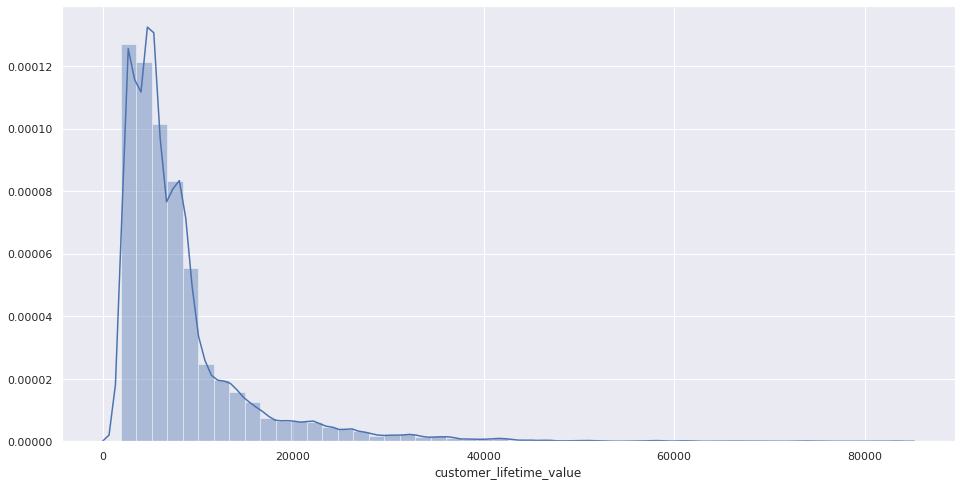

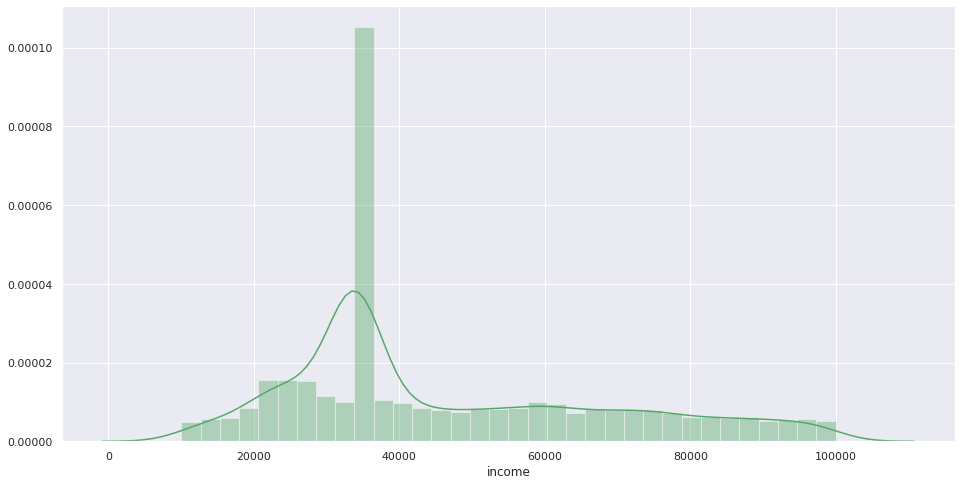

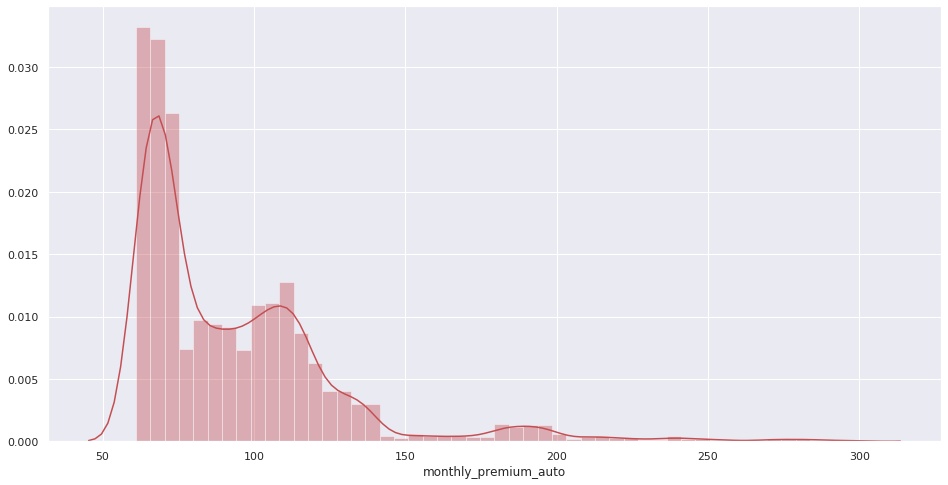

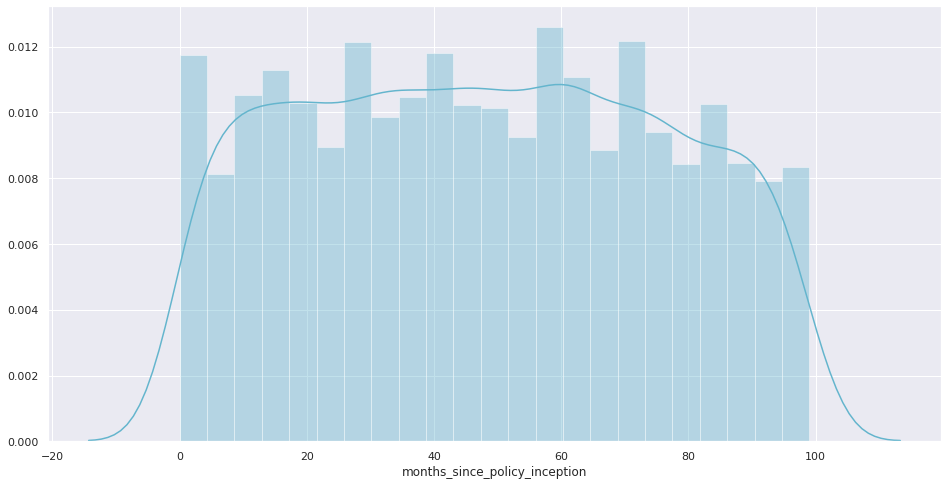

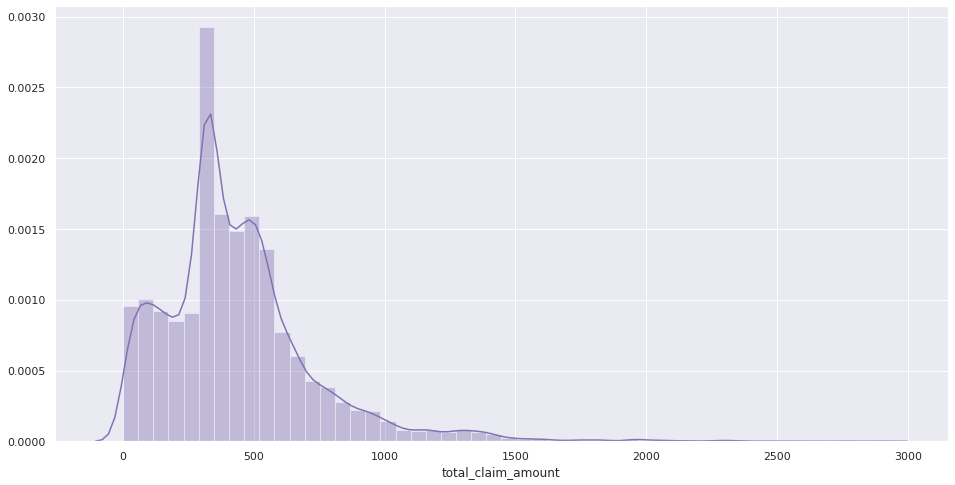

In [31]:
hist_function(continuous_df)


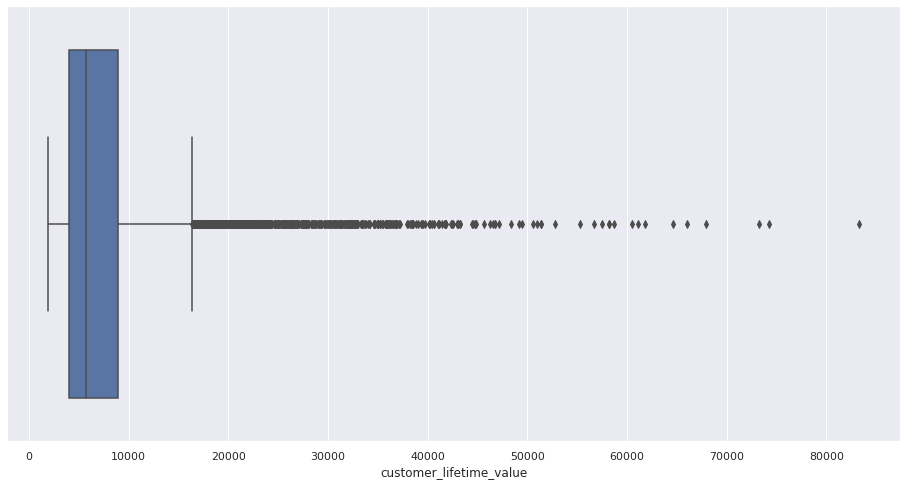

In [32]:
sns.boxplot(continuous_df['customer_lifetime_value'])

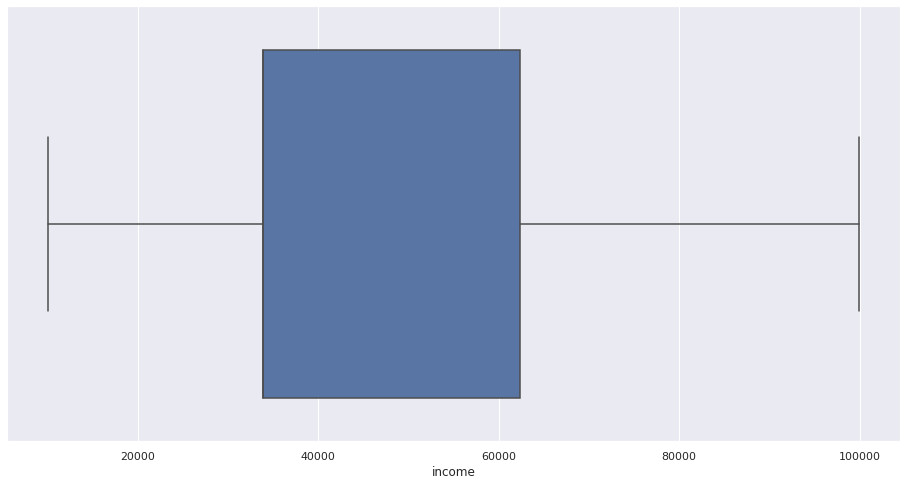

In [33]:
sns.boxplot(continuous_df['income'])

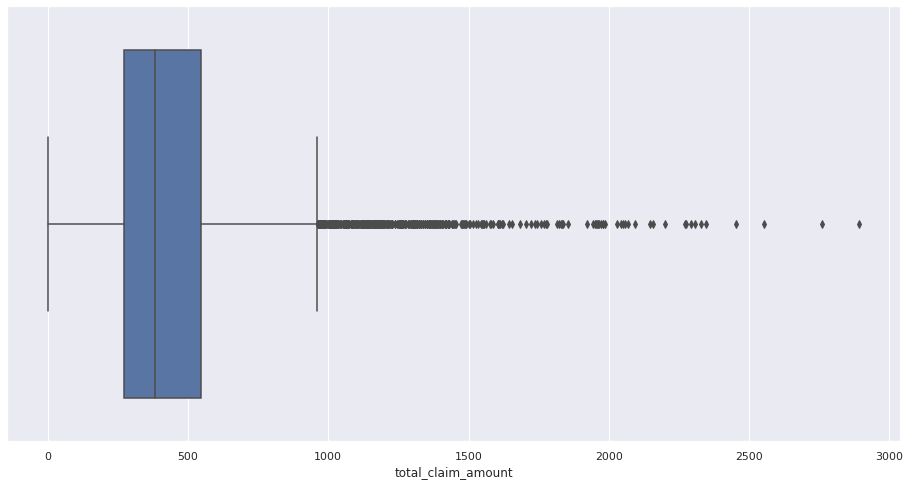

In [34]:
sns.boxplot(continuous_df['total_claim_amount'])

In [35]:
continuous_df['income']

0       56274.0
1       33889.5
2       48767.0
3       33889.5
4       43836.0
         ...   
9129    71941.0
9130    21604.0
9131    33889.5
9132    21941.0
9133    33889.5
Name: income, Length: 9134, dtype: float64

In [36]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [37]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


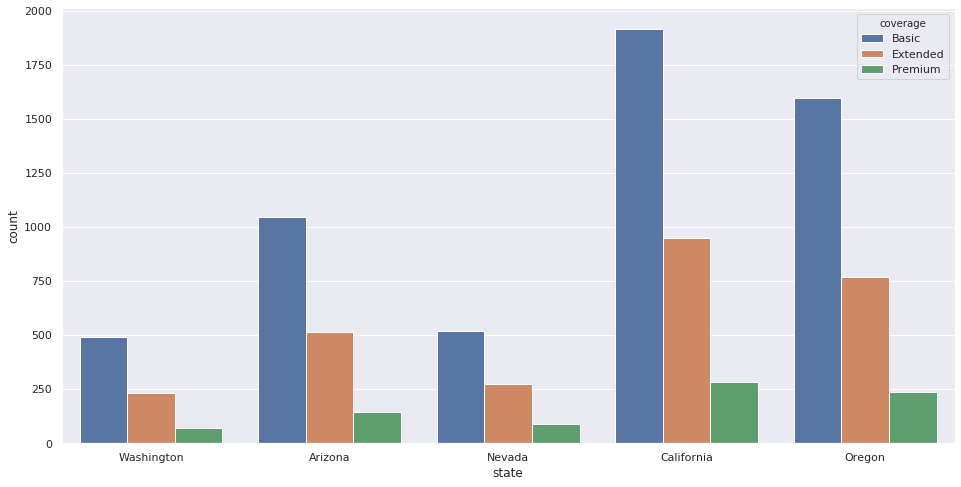

In [38]:
ax = sns.countplot(x="state", hue= 'coverage', data=categorical)

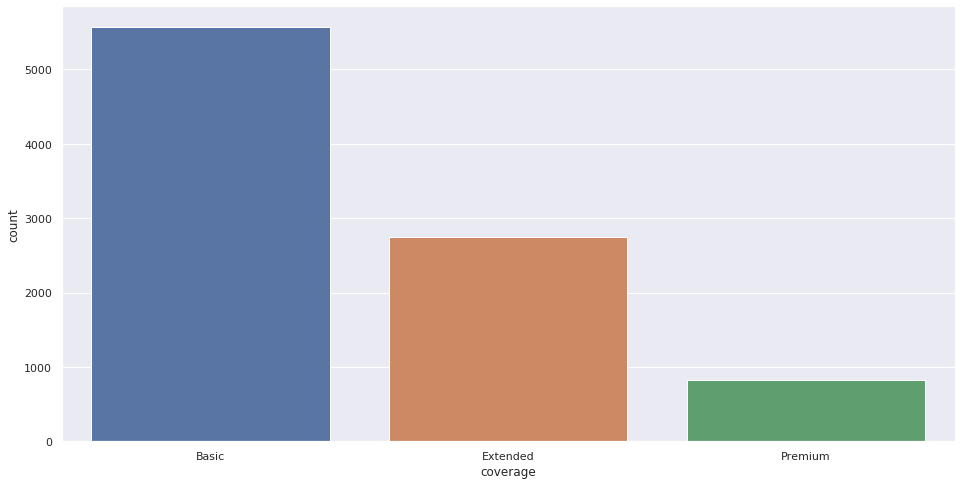

In [39]:
ax = sns.countplot(x="coverage", data=categorical)

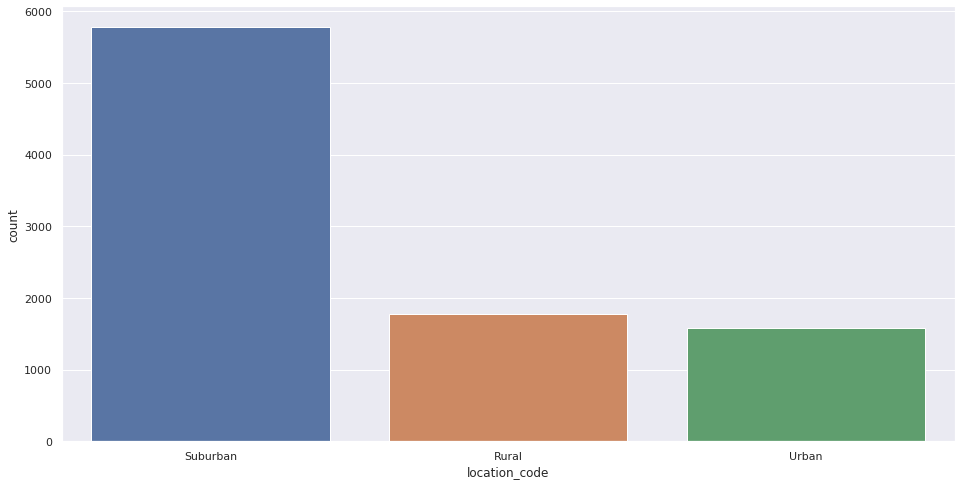

In [40]:
ax = sns.countplot(x="location_code", data=categorical)

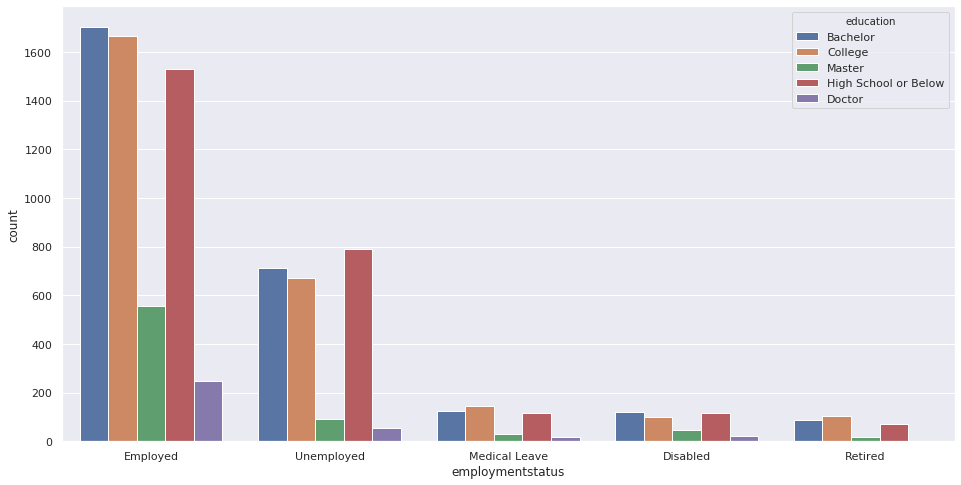

In [41]:
ax = sns.countplot(x="employmentstatus", hue='education', data=categorical)

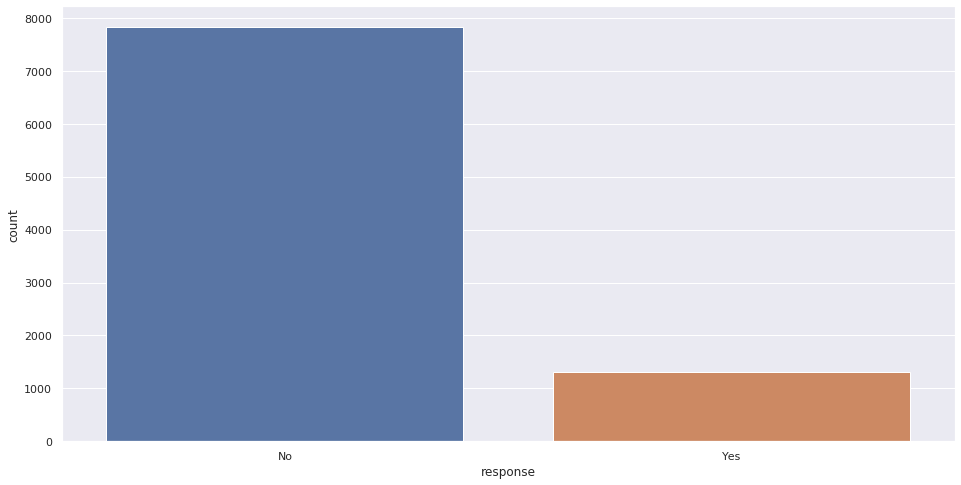

In [42]:
ax = sns.countplot(x="response", data=categorical)

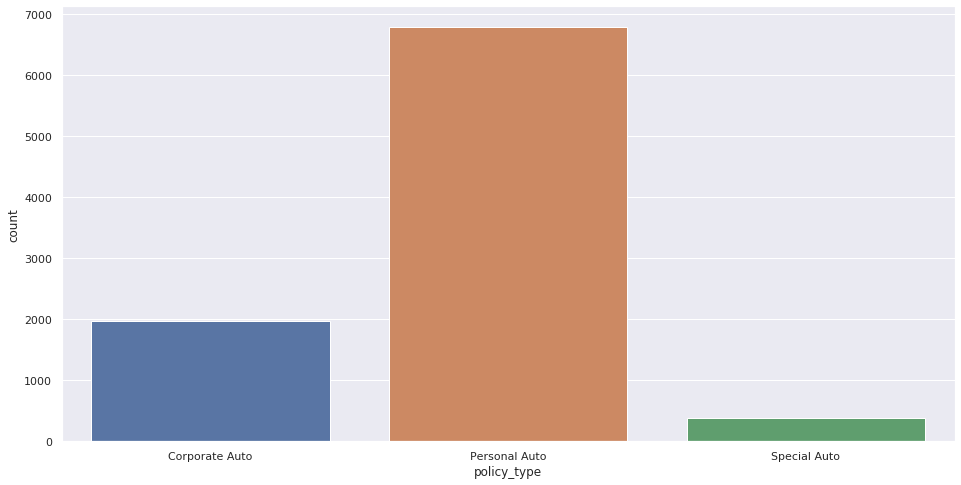

In [43]:
ax = sns.countplot(x="policy_type", data=categorical)

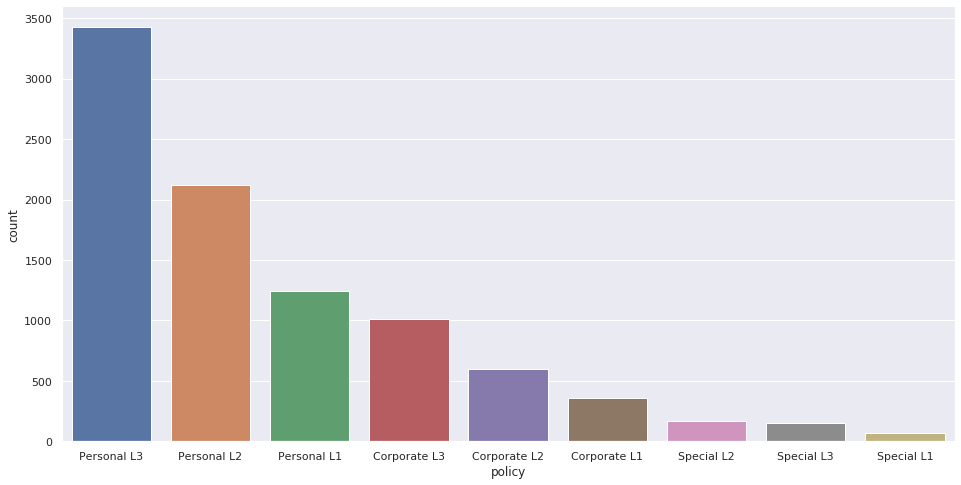

In [44]:
ax = sns.countplot(x="policy", data=categorical, order = categorical['policy'].value_counts().index )

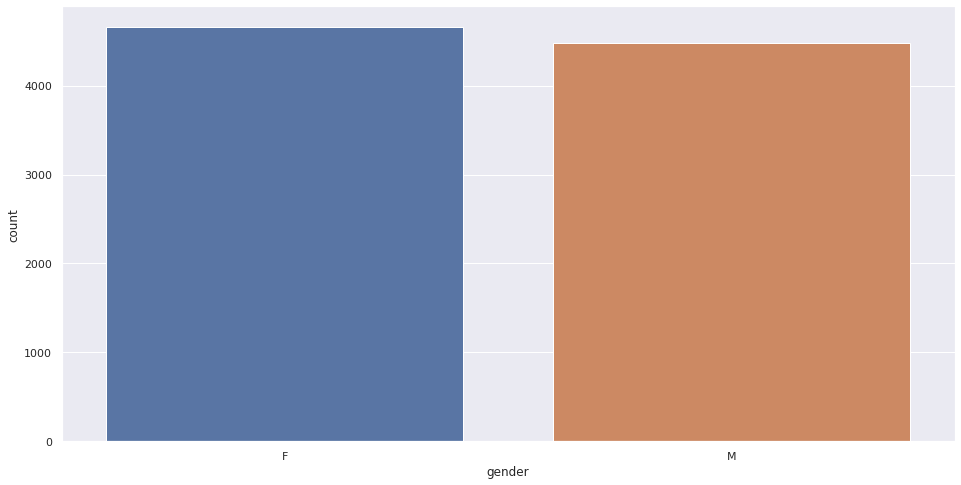

In [45]:
ax = sns.countplot(x="gender", data=categorical)

In [46]:
categorical["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [47]:
L = categorical["policy"].apply(lambda x: x[-2:])
policy = categorical["policy"].apply(lambda x: x[:-2])


In [48]:
L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [49]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [50]:
categorical["policy_name"] = policy

/home/casper/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


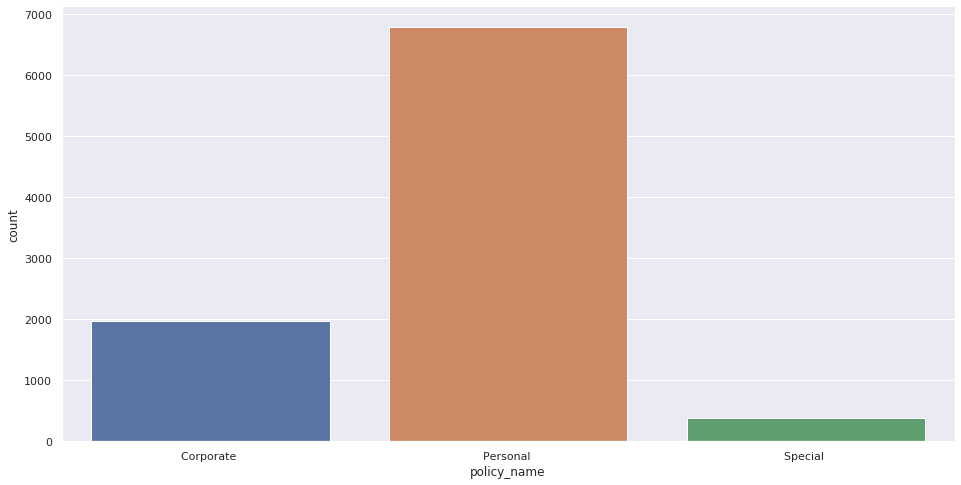

In [51]:
ax = sns.countplot(x="policy_name", data=categorical)

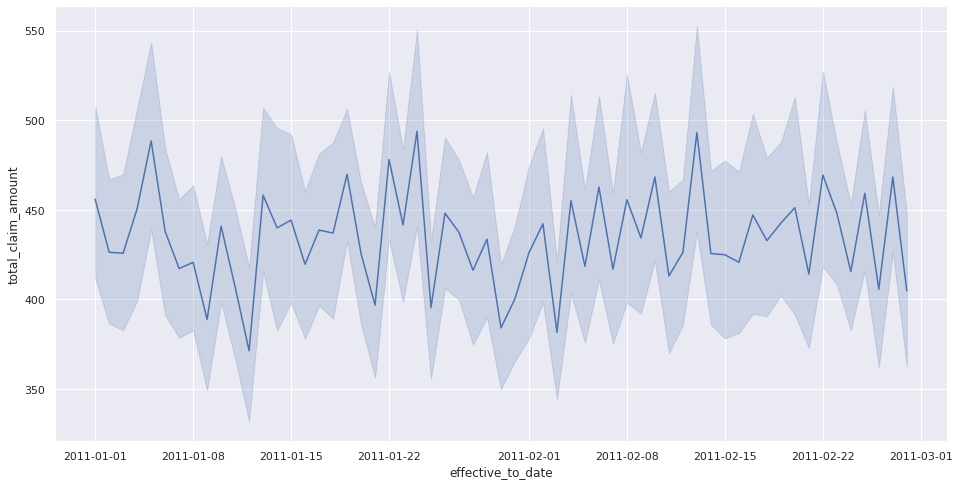

In [52]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df);


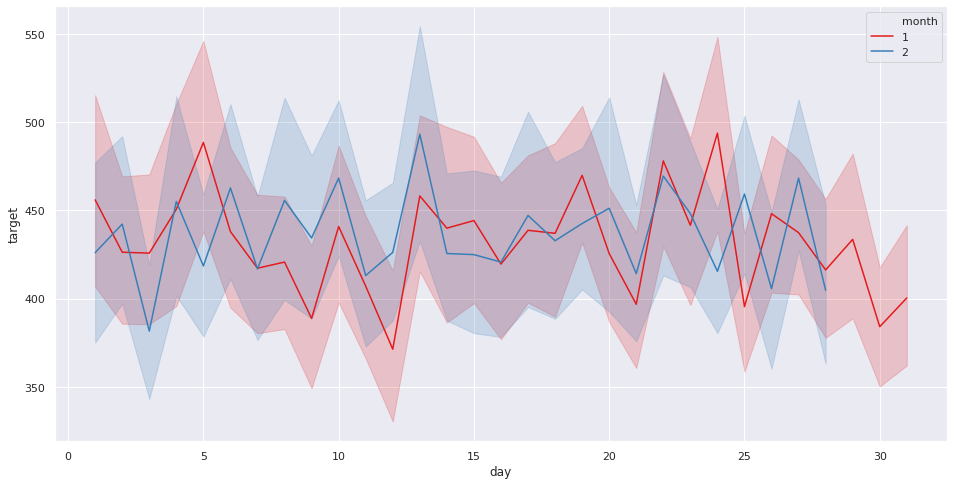

In [53]:
time_df = pd.DataFrame()
time_df["day"] = customer_df["effective_to_date"].dt.day
time_df["week"] = customer_df["effective_to_date"].dt.week
time_df["month"] = customer_df["effective_to_date"].dt.month
time_df["target"] = customer_df["total_claim_amount"]
sns.lineplot(x = time_df.day, y=time_df.target, hue = time_df.month, palette="Set1");

Data Cleaning and Wrangling

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [54]:
# Make a outlier function

In [55]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [56]:
CLV_outliers = outliers(customer_df["customer_lifetime_value"])
MPA_outliers = outliers(customer_df["monthly_premium_auto"])

In [57]:
to_drop = CLV_outliers.index | MPA_outliers.index

In [58]:
clean_customer_df = customer_df.drop(to_drop).reset_index(drop = True)
clean_customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


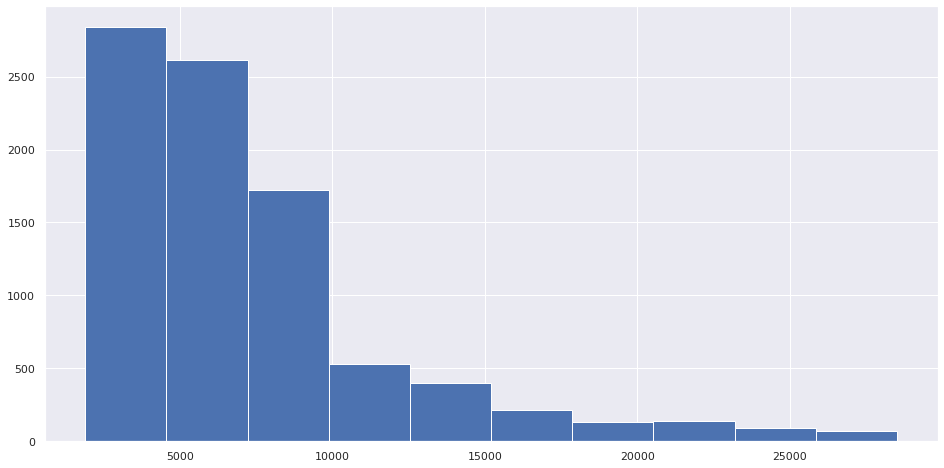

In [59]:
clean_customer_df["customer_lifetime_value"].hist();

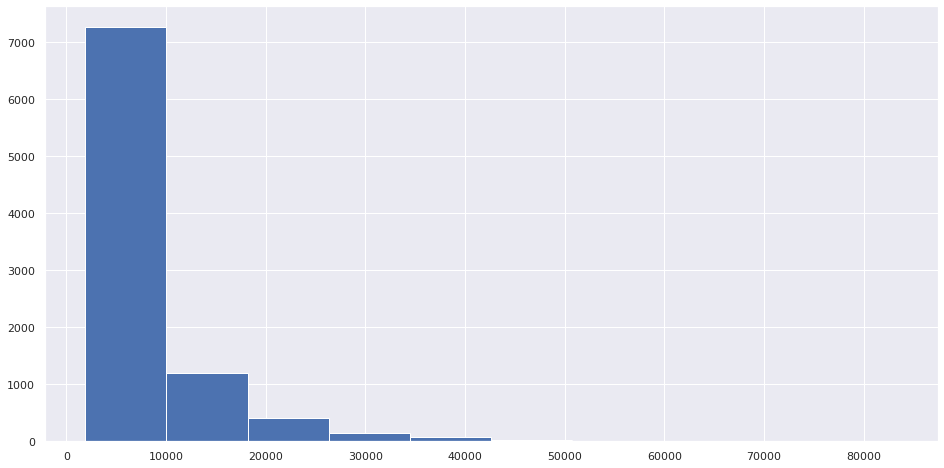

In [60]:
customer_df["customer_lifetime_value"].hist(); # original

In [61]:
df_copy = clean_customer_df.copy()

In [62]:
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [63]:
continuous.remove("months_since_policy_inception")
continuous.remove("total_claim_amount")
for cont_var in continuous:
    maximum = clean_customer_df[cont_var].max()
    minimum = clean_customer_df[cont_var].min()
    clean_customer_df[cont_var] = clean_customer_df[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [64]:
clean_customer_df[continuous].head()


,customer_lifetime_value,income,monthly_premium_auto
0,0.032522,0.514064,0.059259
1,0.190941,0.265193,0.244444
2,0.412934,0.430601,0.348148
3,0.215979,0.265193,0.333333
4,0.034407,0.375778,0.088889


In [65]:
# ENcoding the columns

In [66]:
clean_customer_df["response"] = clean_customer_df["response"].apply(lambda x: 1 if x == "Yes" else 0)

In [67]:
clean_customer_df["education"] = clean_customer_df["education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x)

inactive = ["Medical Leave", "Disabled", "Retired"]
clean_customer_df["employmentstatus"] = clean_customer_df["employmentstatus"].apply(lambda x: "Inactive" if x in inactive else x)

clean_customer_df["gender"] = clean_customer_df["gender"].apply(lambda x: 1 if x == "F" else 0)

clean_customer_df["gender"] = clean_customer_df["gender"].apply(lambda x: 1 if x == "F" else 0)

clean_customer_df["policy"] = clean_customer_df["policy"].apply(lambda x: x[-2:])

luxury = ["Sports Car", "Luxury SUV", "Luxury Car"]
clean_customer_df["vehicle_class"] = clean_customer_df["vehicle_class"].apply(lambda x: "Luxury" if x in luxury else x)

In [68]:
final_df = clean_customer_df.copy()

In [70]:
final_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,0.032522,0,Basic,Bachelor,2011-02-24,Employed,0,0.514064,...,5,0,1,Corporate Auto,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,0.190941,0,Extended,Bachelor,2011-01-31,Unemployed,0,0.265193,...,42,0,8,Personal Auto,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,0.412934,0,Premium,Bachelor,2011-02-19,Employed,0,0.430601,...,38,0,2,Personal Auto,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,0.215979,0,Basic,Bachelor,2011-01-20,Unemployed,0,0.265193,...,65,0,7,Corporate Auto,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,0.034407,0,Basic,Bachelor,2011-02-03,Employed,0,0.375778,...,44,0,1,Personal Auto,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,LA72316,California,0.808175,0,Basic,Bachelor,2011-02-10,Employed,0,0.688250,...,89,0,2,Personal Auto,L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8749,PK87824,California,0.045034,1,Extended,College,2011-02-12,Employed,0,0.128602,...,28,0,1,Corporate Auto,L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8750,TD14365,California,0.235444,0,Extended,Bachelor,2011-02-06,Unemployed,0,0.265193,...,37,3,2,Corporate Auto,L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8751,UP19263,California,0.211417,0,Extended,College,2011-02-03,Employed,0,0.132349,...,3,0,3,Personal Auto,L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [71]:
ordinal = clean_customer_df.drop(columns = "customer")

In [72]:
ordinal["coverage"] = ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["employmentstatus"] = ordinal["employmentstatus"].map({"Unemployed" : 0, "Inactive" : 1, "Employed" : 2})
ordinal["location_code"] = ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["vehicle_size"] = ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [73]:
ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          8753 non-null   object        
 1   customer_lifetime_value        8753 non-null   float64       
 2   response                       8753 non-null   int64         
 3   coverage                       8753 non-null   int64         
 4   education                      8753 non-null   object        
 5   effective_to_date              8753 non-null   datetime64[ns]
 6   employmentstatus               8753 non-null   int64         
 7   gender                         8753 non-null   int64         
 8   income                         8753 non-null   float64       
 9   location_code                  8753 non-null   int64         
 10  marital_status                 8753 non-null   object        
 11  monthly_premium_a

In [74]:
one_hot = ordinal.copy()

In [75]:
one_hot_colums = final_df.select_dtypes(include = object).columns[1:]
one_hot_colums

Index(['state', 'coverage', 'education', 'employmentstatus', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [76]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_colums)
one_hot

,customer_lifetime_value,response,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_0,vehicle_size_1,vehicle_size_2
0,0.032522,0,2011-02-24,0,0.514064,0.059259,32,5,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.190941,0,2011-01-31,0,0.265193,0.244444,13,42,0,8,...,0,0,0,1,0,0,0,0,1,0
2,0.412934,0,2011-02-19,0,0.430601,0.348148,18,38,0,2,...,0,0,0,0,0,0,1,0,1,0
3,0.215979,0,2011-01-20,0,0.265193,0.333333,18,65,0,7,...,0,1,0,0,0,1,0,0,1,0
4,0.034407,0,2011-02-03,0,0.375778,0.088889,12,44,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,0.808175,0,2011-02-10,0,0.688250,0.088889,18,89,0,2,...,0,0,1,1,0,0,0,0,1,0
8749,0.045034,1,2011-02-12,0,0.128602,0.133333,14,28,0,1,...,1,0,0,1,0,0,0,0,1,0
8750,0.235444,0,2011-02-06,0,0.265193,0.177778,9,37,3,2,...,1,0,0,1,0,0,0,0,1,0
8751,0.211417,0,2011-02-03,0,0.132349,0.259259,34,3,0,3,...,1,0,0,1,0,0,0,0,0,1


In [85]:
final_df = one_hot.copy()

In [91]:
final_df["day"] = time_df["day"]
final_df["week"] = time_df["week"]
final_df["month"] = time_df["month"]
final_df = final_df.drop(columns = "effective_to_date")

In [92]:
final_df.apply(pd.to_numeric)

,customer_lifetime_value,response,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,...,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_0,vehicle_size_1,vehicle_size_2,day,week,month
0,0.032522,0,0,0.514064,0.059259,32,5,0,1,384.811147,...,0,0,0,1,0,1,0,24,8,2
1,0.190941,0,0,0.265193,0.244444,13,42,0,8,1131.464935,...,1,0,0,0,0,1,0,31,5,1
2,0.412934,0,0,0.430601,0.348148,18,38,0,2,566.472247,...,0,0,0,1,0,1,0,19,7,2
3,0.215979,0,0,0.265193,0.333333,18,65,0,7,529.881344,...,0,0,1,0,0,1,0,20,3,1
4,0.034407,0,0,0.375778,0.088889,12,44,0,1,138.130879,...,1,0,0,0,0,1,0,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,0.808175,0,0,0.688250,0.088889,18,89,0,2,198.234764,...,1,0,0,0,0,1,0,7,6,2
8749,0.045034,1,0,0.128602,0.133333,14,28,0,1,379.200000,...,1,0,0,0,0,1,0,22,3,1
8750,0.235444,0,0,0.265193,0.177778,9,37,3,2,790.784983,...,1,0,0,0,0,1,0,19,3,1
8751,0.211417,0,0,0.132349,0.259259,34,3,0,3,691.200000,...,1,0,0,0,0,0,1,20,3,1


In [93]:
# Regression Models

In [94]:
#Import libraries


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "total_claim_amount"),
                                                    final_df.total_claim_amount, test_size = 0.2)

In [96]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.7476406680225671, Test -> 0.7596115263694928
Lasso: Train -> 0.7453775494428276, Test -> 0.7533153909043641
Ridge: Train -> 0.7476132125927345, Test -> 0.7588593283676646
ElasticNet: Train -> 0.4672158335030867, Test -> 0.44748254713110913


In [97]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.019872205337079007, Test -> -0.015405958866316016


In [98]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.29881846151908853, Test -> -0.02444012468368384


In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 1.0, Test -> 0.6625511282920343


In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.8480804248345483, Test -> 0.8297128629177873
RandomForestRegressor: Train -> 0.9753488902801988, Test -> 0.8319850332756534


In [101]:
from sklearn.neural_network import MLPRegressor
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation(mlpr, X_train, y_train)

MLPRegressor: Train -> 0.8341463352012026, Test -> 0.8124128846961198


In [102]:
# Random Variable Lab

In [103]:
from scipy import stats

Get the numerical variables from our dataset.

Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [108]:
continuous_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [109]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [111]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_policy_inception  9134 non-null   int64  
 4   total_claim_amount             9134 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 356.9 KB


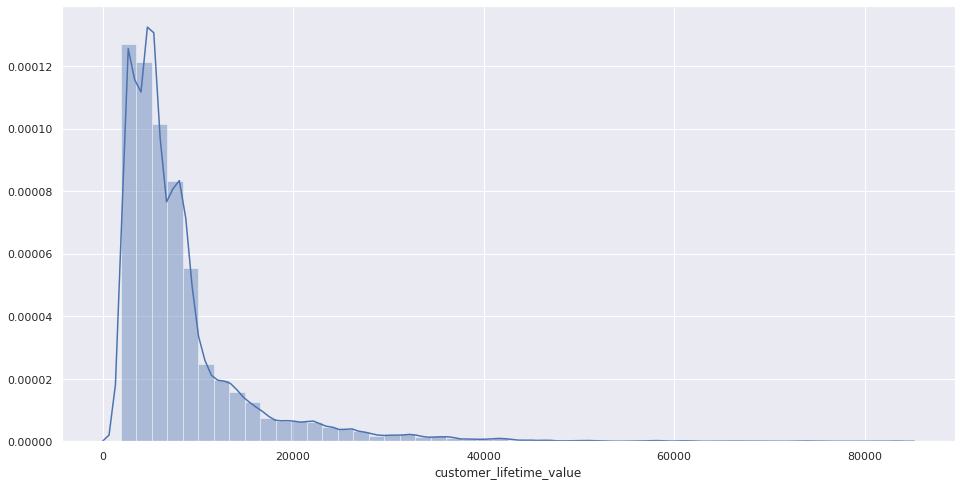

In [112]:
sns.distplot(numericals['customer_lifetime_value'])

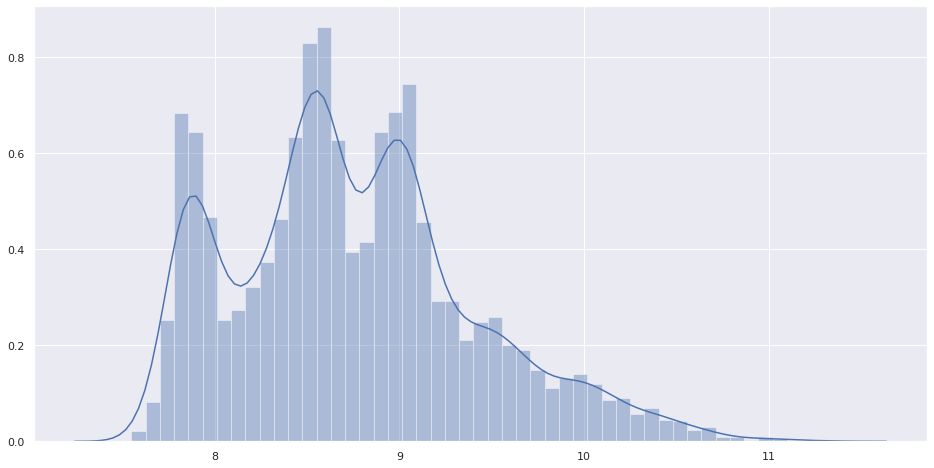

In [113]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0
temp = list(map(log_transfom_clean, numericals['customer_lifetime_value']))
sns.distplot(temp)
plt.show()

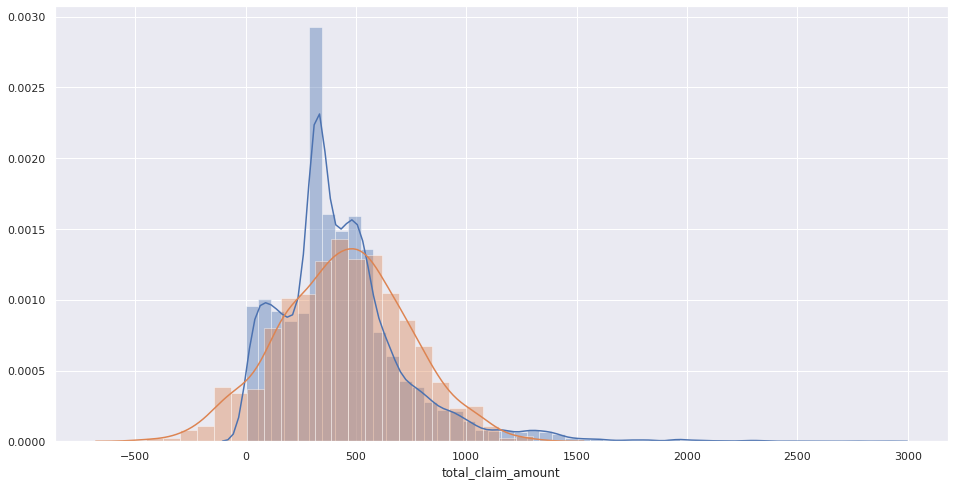

In [114]:
m = continuous_df["total_claim_amount"].mean()
s = continuous_df["total_claim_amount"].std()
sns.distplot(continuous_df["total_claim_amount"])
sns.distplot(stats.norm(m,s).rvs(1000))

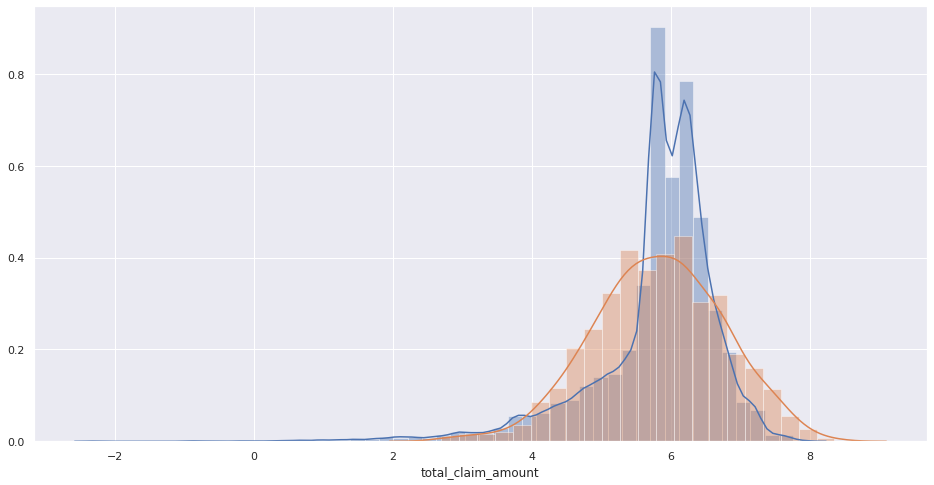

In [115]:

transformed = np.log(continuous_df["total_claim_amount"])
mt = transformed.mean()
st = transformed.std()
sns.distplot(transformed)
sns.distplot(stats.norm(mt,st).rvs(1000))

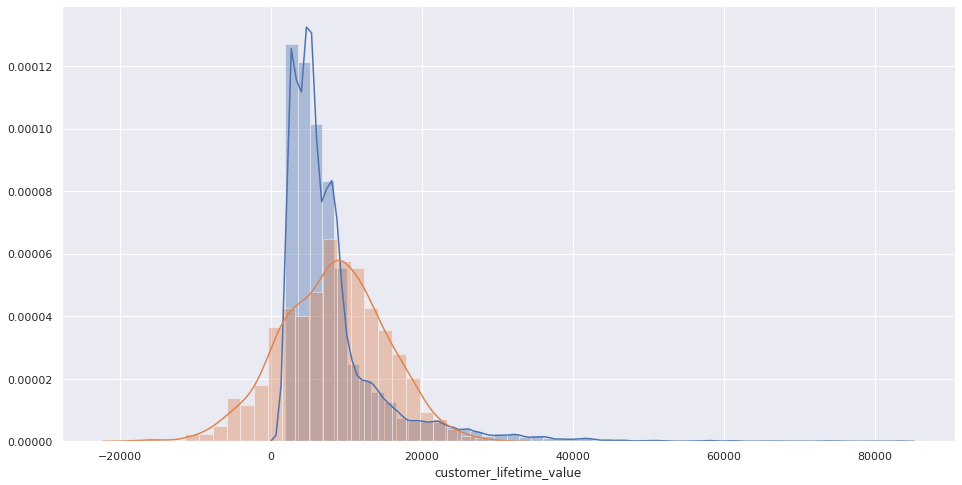

In [116]:
m = continuous_df["customer_lifetime_value"].mean()
s = continuous_df["customer_lifetime_value"].std()
sns.distplot(continuous_df["customer_lifetime_value"])
sns.distplot(stats.norm(m,s).rvs(1000))

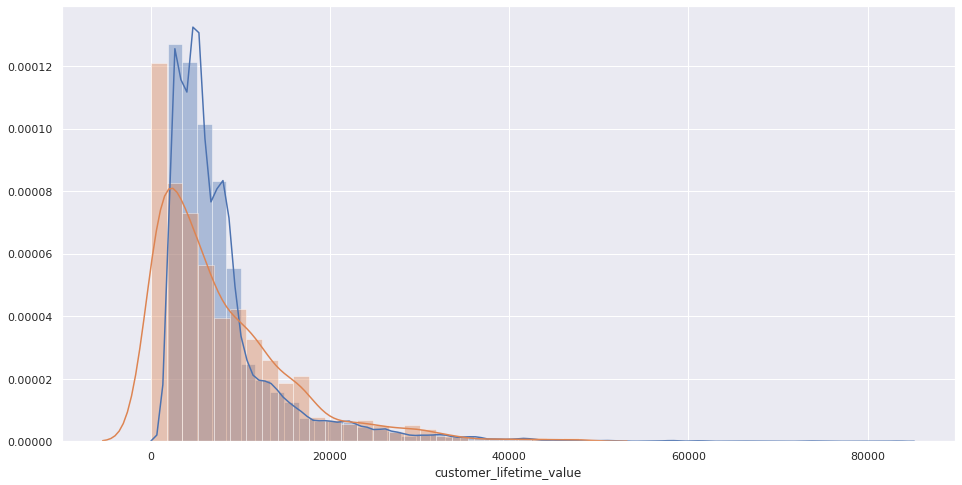

In [117]:
sns.distplot(continuous_df["customer_lifetime_value"])
sns.distplot(m*stats.expon(1/m).rvs(1000))

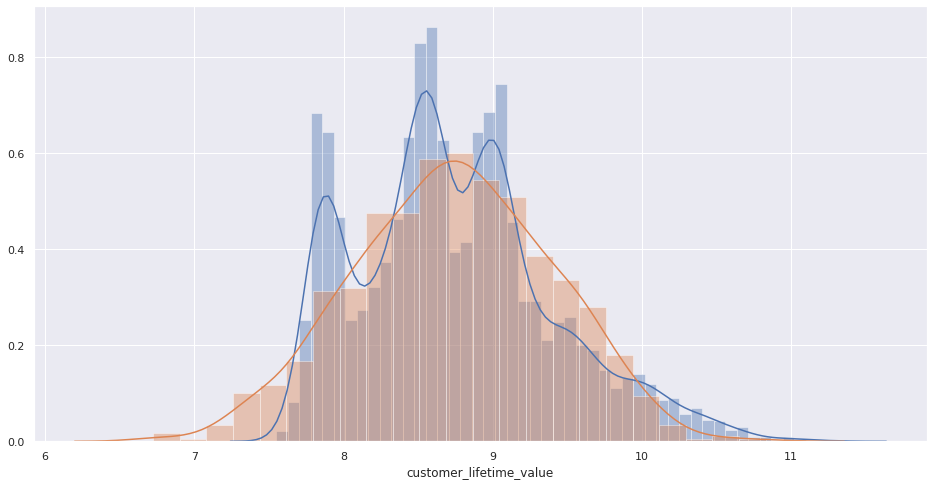

In [118]:
transformed = np.log(continuous_df["customer_lifetime_value"])
mt = transformed.mean()
st = transformed.std()
sns.distplot(transformed)
sns.distplot(stats.norm(mt,st).rvs(1000))

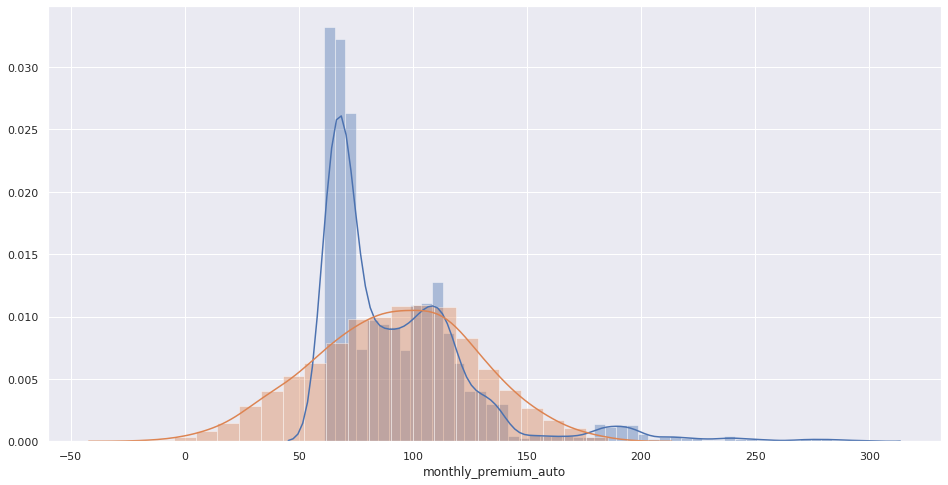

In [119]:
m = continuous_df["monthly_premium_auto"].mean()
s = continuous_df["monthly_premium_auto"].std()
sns.distplot(continuous_df["monthly_premium_auto"])
sns.distplot(stats.norm(m,s).rvs(1000))

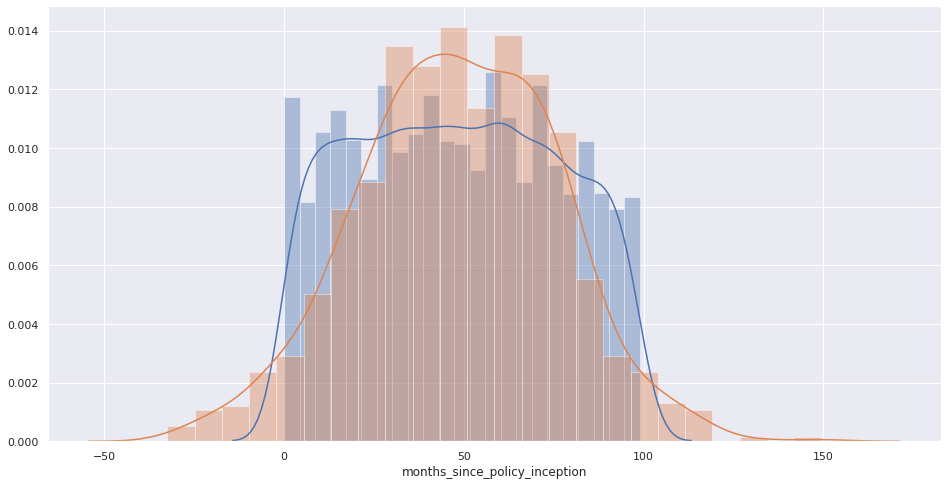

In [120]:
m = continuous_df["months_since_policy_inception"].mean()
s = continuous_df["months_since_policy_inception"].std()
sns.distplot(continuous_df["months_since_policy_inception"])
sns.distplot(stats.norm(m,s).rvs(1000))

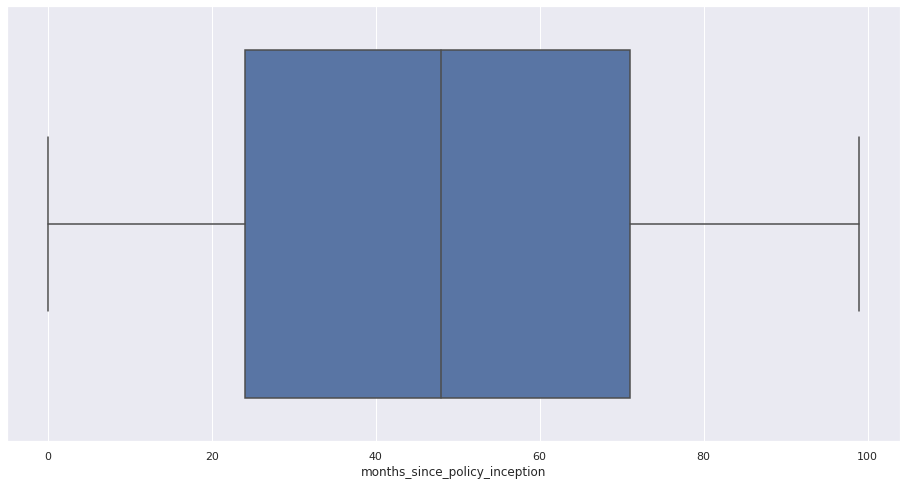

In [121]:
sns.boxplot(continuous_df["months_since_policy_inception"])

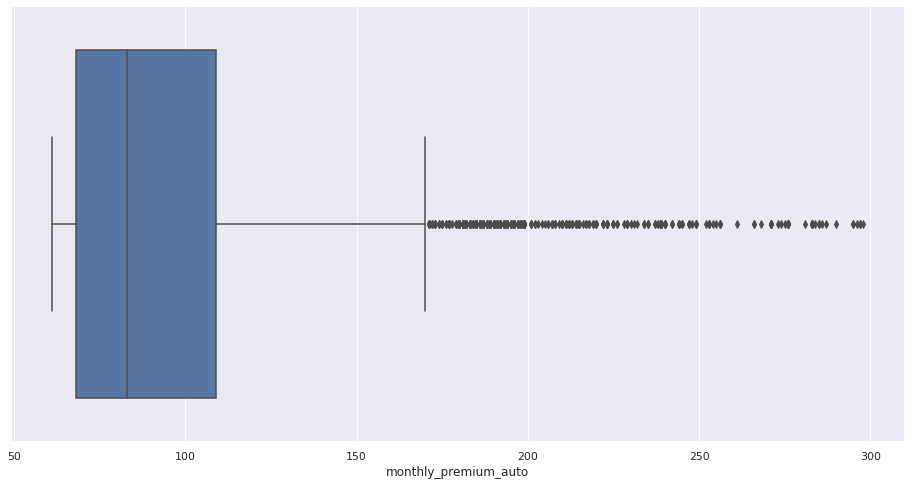

In [123]:
sns.boxplot(continuous_df["monthly_premium_auto"])

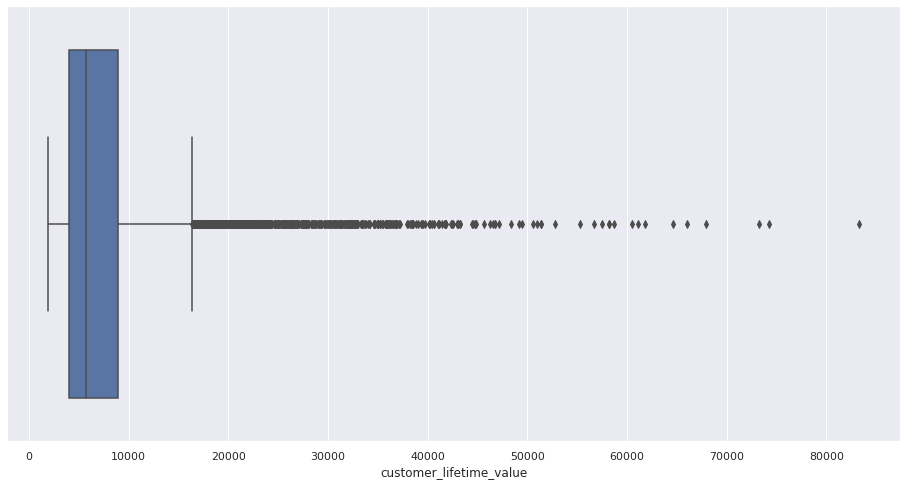

In [124]:
sns.boxplot(continuous_df["customer_lifetime_value"])

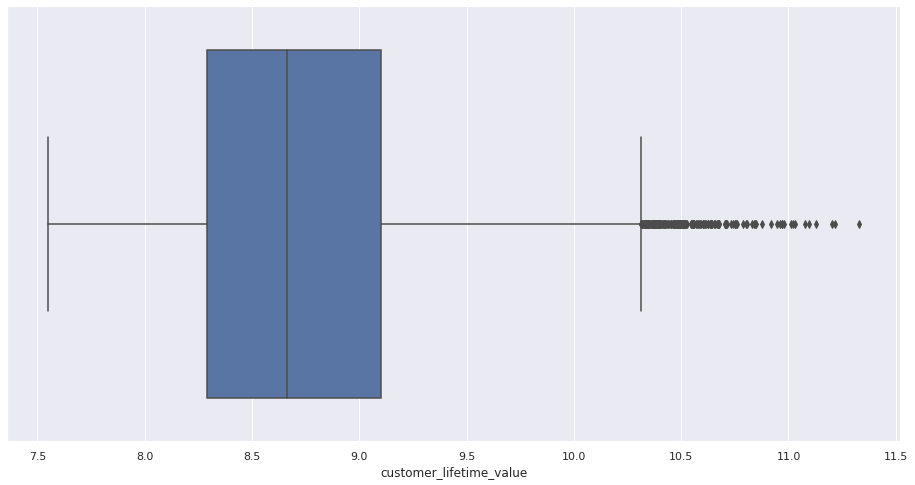

In [125]:
sns.boxplot(transformed)